## Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.
Dataset
Population of U.S. Cities
## Description
The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.
## Format
This data frame contains the following columns:
u The 1920 population.
x The 1930 population.
There is one unnamed column also in this dataset. Please remove and ignore that coloumn.
Source
The data were obtained from
Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley
References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.


## Question 1 Read the dataset given in file named 'bigcity.csv'.
## And check the dataset for any missing values and also print out the correlation matrix

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Import all relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importing lib to split data into training set and test set
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Import the csv into data frame
bigcity_df = pd.read_csv("bigcity.csv")

In [4]:
bigcity_df.shape

(49, 3)

In [5]:
bigcity_df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [6]:
bigcity_df.isna().sum()

Unnamed: 0    0
u             0
x             0
dtype: int64

In [7]:
bigcity_df.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


In [8]:
bigcity_df["u"].corr(bigcity_df["x"])

0.981741951099581

The high correlation betwwen u and x indicates that the variable u can be a good predictor of variable x

## Question 2 - Transform the dataset and Split data into train, test sets.
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe.
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [9]:
bigcity_df.columns
bigcity_df = bigcity_df.drop(labels=['Unnamed: 0'], axis=1)

In [10]:
bigcity_df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [11]:
#Finding number of rows
bigcity_df.shape

(49, 2)

In [12]:
x = bigcity_df.drop(labels= "x" , axis = 1)
x.head()

,u
0,138
1,93
2,61
3,179
4,48


In [13]:
y = bigcity_df.drop(labels ="u",axis =1)
y.head()

,x
0,143
1,104
2,69
3,260
4,75


In [15]:
# Split X and y into training and test set in 80:20 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [16]:
x_train.shape

(39, 1)

In [17]:
y_train.shape

(39, 1)

In [18]:
x_test.shape

(10, 1)

In [19]:
y_test.shape

(10, 1)

## Question 3 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [20]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Coefficient 
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for u is 1.1594512342174779


In [22]:
# Intercept
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9.718455322828262


## Question 4 - Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.
Hint - y = mx + c, plot y

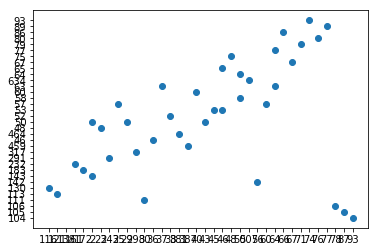

In [23]:
plt.scatter(x_train, y_train)

## Question 5 - Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 
Performing root operation over mean square error over mean square error gives you root mean square error

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [25]:
y_predict = regression_model.predict(x_test)
y_predict

array([[167.40382318],
       [148.85260343],
       [ 60.73430963],
       [ 51.45869975],
       [ 80.44498061],
       [217.26022625],
       [ 56.09650469],
       [306.53797128],
       [ 59.57485839],
       [118.70687134]])

In [26]:
mse = mean_squared_error(y_test,y_predict)
mse

546.869224903266

In [27]:
rmse = math.sqrt(mse)
rmse

23.385235190249123

In [28]:
r2score = r2_score(y_test,y_predict)
r2score

0.9181922560396981

## Question 6 - Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [29]:
regression_model.score(x_train, y_train)

0.9682175540860046

In [30]:
regression_model.score(x_test, y_test)

0.9181922560396981

# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [31]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importing lib to split data into training set and test set
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Q7. Load the PIMA Indian Diabetes file into Python DataFrame. And print 10 samples from the dataset


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [32]:
Diab_df = pd.read_csv('pima-indians-diabetes.csv')

In [33]:
Diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

## Q8 Print the datatypes of each column and the shape of the dataset. And replace all the 0s in the column with the median of the same column value accordingly.

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [34]:
Diab_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [35]:
# Columns which have zero value
Diab_df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                       500
dtype: int64

In [36]:
#Diab_df[Diab_df["Glucose"]==0]

In [37]:
#Diab_df.iloc[[Diab_df["Glucose"]==0]] = Diab_df.Glucose.median()
Diab_df=Diab_df.replace({'Glucose': {0: Diab_df["Glucose"].median()}})

In [38]:
#Diab_df.iloc[[Diab_df["BloodPressure"]==0]] = Diab_df.BloodPressure.median()
Diab_df=Diab_df.replace({'BloodPressure': {0: Diab_df["BloodPressure"].median()}})

In [39]:
#Diab_df.iloc[[Diab_df["SkinThickness"]==0]] = Diab_df.SkinThickness.median()
Diab_df=Diab_df.replace({'SkinThickness': {0: Diab_df["SkinThickness"].median()}})

In [40]:
#Diab_df.iloc[[Diab_df["Insulin"]==0]] = Diab_df.Insulin.median()
Diab_df=Diab_df.replace({'Insulin': {0: Diab_df["Insulin"].median()}})

In [41]:
#Diab_df.iloc[[Diab_df["BMI"]==0]] = Diab_df.BMI.median()
Diab_df=Diab_df.replace({'BMI': {0: Diab_df["BMI"].median()}})

In [42]:
# Columns which have zero value
Diab_df.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Class                       500
dtype: int64

## Q9 See the distribution of 'Class' variable and plot it using appropriate graph.

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using the plot - infer the relationship between different variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEE4E7AAC8>,
      dtype=object)

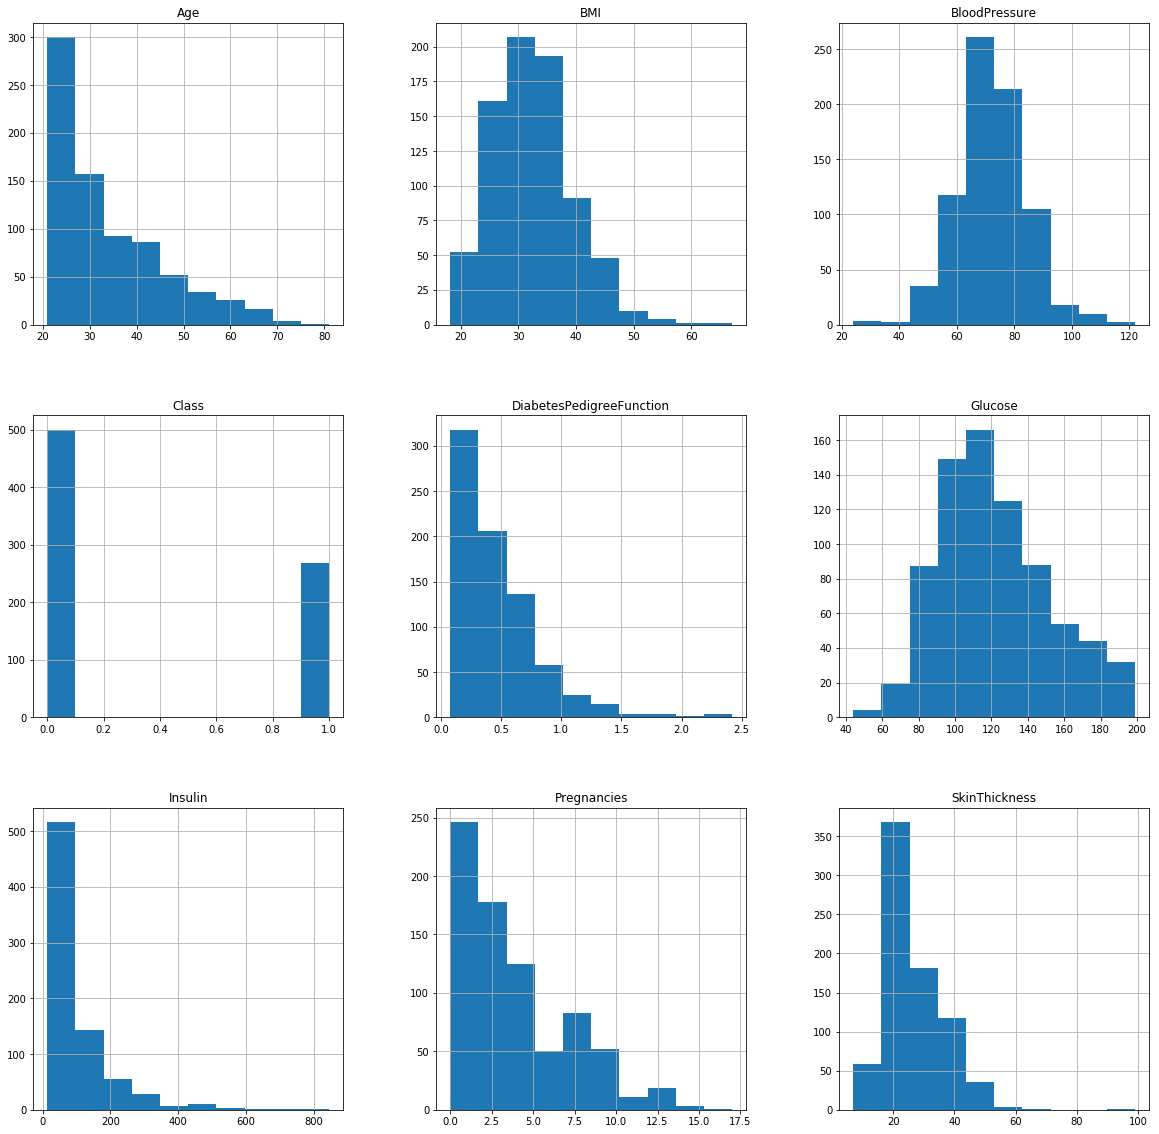

In [43]:
Diab_df.hist(figsize = [20,20])

In [ ]:
sns.pairplot(Diab_df, diag_kind='kde',  hue = 'Class')

Based on scatter plot matrix Glucose, BMI and Age seem to have an impact on Diabetes

In [44]:
# Coefficient analysis also give the same result as scatter analysis
Diab_df.corr().iloc[:,8:9]

,Class
Pregnancies,0.221898
Glucose,0.492782
BloodPressure,0.165723
SkinThickness,0.189065
Insulin,0.148457
BMI,0.312249
DiabetesPedigreeFunction,0.173844
Age,0.238356
Class,1.000000


## Q10 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test). And create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [45]:
#Capture the features from all columns except Class
x = Diab_df.drop(labels= "Class" , axis = 1)
x.shape

(768, 8)

In [46]:
# Capture the class values from the 'Class' column
Diab_df['Class'] = Diab_df.Class.astype('category')
y= Diab_df["Class"]
y.shape

(768,)

In [47]:
Diab_df.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Class                       category
dtype: object

In [48]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [49]:
DF_model = DecisionTreeClassifier(criterion ='entropy', random_state=0)

DF_model.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Q11 Print the accuracyof the model and print the confusion matrix.

In [50]:
y_predict  = DF_model.predict(x_test)

In [51]:
y_predict

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

Print the feature importance of the decision model - Optional

In [52]:
acc=metrics.accuracy_score(y_test,y_predict)
print(acc)

0.7272727272727273


In [53]:
cm=metrics.confusion_matrix(y_test,y_predict)
print(cm)

[[112  34]
 [ 29  56]]


In [56]:
feature_importances = DF_model.feature_importances_
feature_importances

array([0.10912169, 0.25117035, 0.13464224, 0.04660286, 0.00554272,
       0.24105101, 0.10456368, 0.10730544])

In [57]:
Diab_df_attr = Diab_df.iloc[:, 0:8]
feature_names = Diab_df_attr.columns[0:8]
print(feature_names)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )

In [59]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
y_predict  = RF_model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
print(acc)

0.7662337662337663


## Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
abcl = AdaBoostClassifier(base_estimator=RF_model,n_estimators= 51)
abcl.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [64]:
y_predict  = abcl.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
print(acc)

0.7878787878787878


## Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
bgcl = BaggingClassifier(base_estimator=RF_model,n_estimators=51,oob_score=True)

In [67]:
bgcl.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [68]:
y_predict  = bgcl.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
print(acc)

0.7835497835497836


## Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)

In [70]:
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [71]:
y_predict  = gbcl.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
print(acc)

0.8008658008658008


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
enclf = VotingClassifier(estimators = [('dor', DF_model), ('rf', RF_model), ('boost', gbcl), ('bagg', bgcl)], voting = 'hard')

In [73]:
for clf, label in zip([DF_model , RF_model, gbcl, bgcl], ['Decision Tree', 'RandomForest', 'Boosting', 'Bagging']):
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.69 (+/- 0.02) [Decision Tree]
Accuracy: 0.75 (+/- 0.01) [RandomForest]
Accuracy: 0.77 (+/- 0.03) [Boosting]
Accuracy: 0.76 (+/- 0.02) [Bagging]
